# Project: Neural Network
- Diabetes Classification
- Given a dataset of various metrics can we predict if a patient has diabetes

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/diabetes.csv**

In [2]:
data = pd.read_csv('files/diabetes.csv')
data.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 3: Check for data quality
- Check **.isna().sum()**
- Check **.dtypes**

In [3]:
data.isna().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class variable                  0
dtype: int64

In [4]:
data.dtypes

Number of times pregnant          int64
Plasma glucose concentration      int64
Diastolic blood pressure          int64
Triceps skin fold thickness       int64
2-Hour serum insulin              int64
Body mass index                 float64
Diabetes pedigree function      float64
Age                               int64
Class variable                    int64
dtype: object

### Step 4: Create dataset
- Assign **X** to all but the last column
- Assign **y** to the last column

In [5]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [6]:
X.shape, y.shape

((768, 8), (768,))

### Step 5: Create training and test set
- Use **train_test_split** to create **X_train, X_test, y_train, y_test**.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Step 6: Calculate average accuracy for 10 runs
- Create an empty list and assign it to **accuracies**
- Loop over **i** over 10 integers.
    - Set the random seed: **tf.random.set_seed(i)**
    - Create a **Sequential** model
    - Add a **Dense** layer with one exit node and **input_dim=8**, and **activation='sigmoid'**
    - Compile the model with **loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']**
    - Fit the model with **epochs=1500, batch_size=100, verbose=0**
    - Calculate the accuracy with **evaluate** on **X_test** and **y_test**
        - The second return variable is the accuracy
    - Append the accuracy (possibly multiplied by 100) to **accuraries**
- Calculate the average value

In [8]:
accuracies = []

for i in range(10):
    tf.random.set_seed(i)
    model = Sequential()
    model.add(Dense(1, input_dim=8, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=1500, batch_size=100, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test)
    accuracies.append(accuracy*100)

sum(accuracies)/len(accuracies)

6/6 [==============================] - 0s 798us/step - loss: 0.5238 - accuracy: 0.7760


75.15625

### Step 7: Predict values
- Predict all values with model on **X**
- Make it into class ids with **np.where(y_pred < 0.5, 0, 1)** *(assuming **y_pred** is the predictions)*

In [9]:
y_pred = model.predict(X)
y_pred = np.where(y_pred < 0.5, 0, 1)

### Step 8 (Optional): Visualize correct vs incorrect predictions
- Calculate the ones that differ
    - **np.abs(y.to_numpy() - y_pred.T)** *(assuming the variables names are correct)*
    - Incorrect predictions will be 1, correct will be 0
- Make a scatter plot with the two variables and the correctness calculations as colors

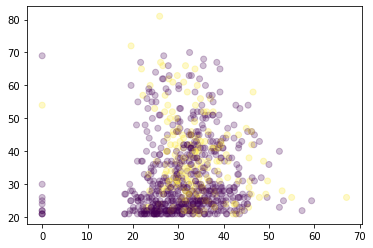

In [10]:
colors = np.abs(y.to_numpy() - y_pred.T)

fig, ax = plt.subplots()
ax.scatter(x=X['Body mass index'], y=X['Age'], c=colors, alpha=.25)